In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import ChessDataset

ROOT = 'data/train/'
ds = ChessDataset(ROOT)

In [2]:
x = []
for _, ann in ds:
    x.append((ann['id'].item(), ann['boxes'].shape[0]))

In [59]:
df = pd.DataFrame(x, columns=['id', 'n_obj'])
df['label'] = pd.cut(df['n_obj'], bins=[0, 1, 7, 12, 20, 25, 31, 32], labels=list('ABCDEFG'))

from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(df, stratify=df['label'], train_size=120)

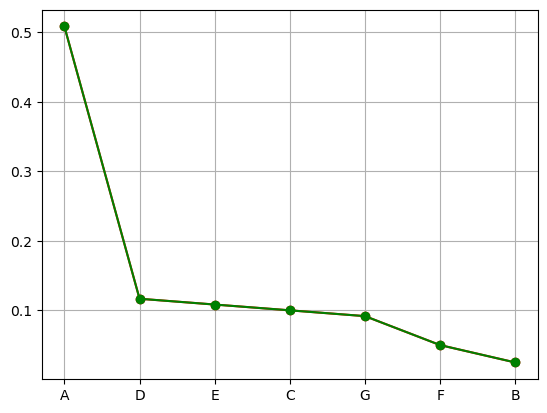

In [62]:
ax = train['label'].value_counts(normalize=True).plot(marker='o', c='r', label='train')
train['label'].value_counts(normalize=True).plot(marker='o', c='g', label='test', ax=ax)
plt.grid()